In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Path to your dataset
dataset_path = 'MalayFood'



In [2]:
#to use pathlib
import pathlib
print(dataset_path)

dataset_path=pathlib.Path(dataset_path)

MalayFood


In [3]:
print(dataset_path)



MalayFood


In [4]:
from pathlib import Path
import imghdr
import os

data_dir = "MalayFood"
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

#to remove image that not accepted by tensorflow
img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
            os.remove(filepath)
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
            os.remove(filepath)  # Remove the file

In [5]:
from PIL import Image
satay = list(dataset_path.glob('satay/*'))
print(satay[0])
image = Image.open(str(satay[0]))
image.show()

MalayFood\satay\0.jpg


In [6]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  dataset_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4749 files belonging to 5 classes.
Using 3800 files for training.


In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  dataset_path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4749 files belonging to 5 classes.
Using 949 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['fried_rice', 'kaya_toast', 'nasi_lemak', 'roti_canai', 'satay']


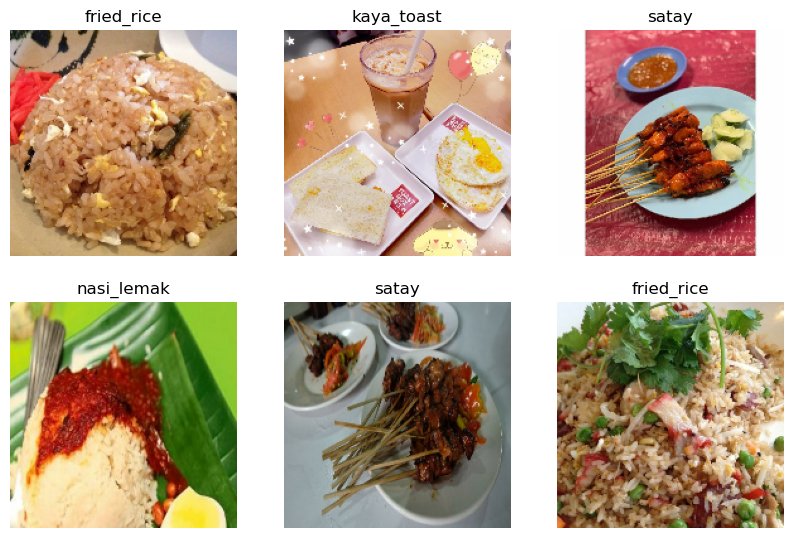

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

In [13]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 24639365 (93.99 MB)
Trainable params: 1051653 (4.01 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [15]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
epochs=5
history = resnet_model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/5


119/119 [==============================] - 139s 1s/step - loss: 0.7828 - accuracy: 0.7832 - val_loss: 0.4660 - val_accuracy: 0.8493
Epoch 2/5
119/119 [==============================] - 165s 1s/step - loss: 0.3045 - accuracy: 0.8955 - val_loss: 0.3716 - val_accuracy: 0.8704
Epoch 3/5
119/119 [==============================] - 194s 2s/step - loss: 0.1915 - accuracy: 0.9366 - val_loss: 0.3635 - val_accuracy: 0.8757
Epoch 4/5
119/119 [==============================] - 176s 1s/step - loss: 0.1296 - accuracy: 0.9584 - val_loss: 0.3725 - val_accuracy: 0.8925
Epoch 5/5
119/119 [==============================] - 148s 1s/step - loss: 0.0934 - accuracy: 0.9739 - val_loss: 0.3328 - val_accuracy: 0.9041


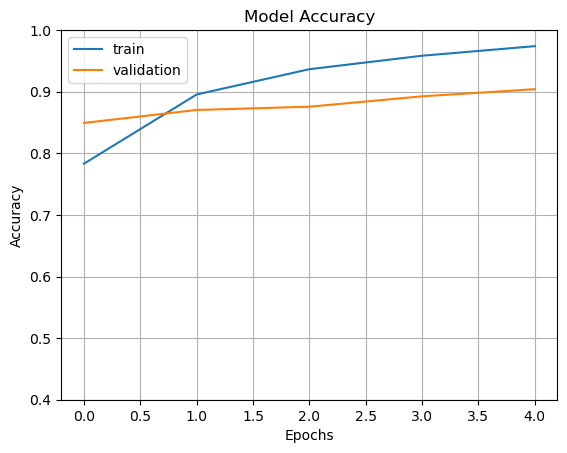

In [17]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

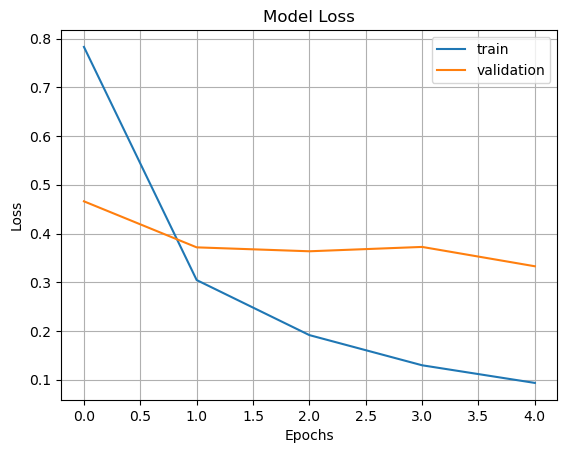

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [61]:
pip install opencv-python

   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.2/38.1 MB 3.8 MB/s eta 0:00:10
   - -------------------------------------- 1.5/38.1 MB 13.7 MB/s eta 0:00:03
   --- ------------------------------------ 3.7/38.1 MB 26.3 MB/s eta 0:00:02
   ---- ----------------------------------- 4.2/38.1 MB 20.7 MB/s eta 0:00:02
   ----- ---------------------------------- 4.8/38.1 MB 19.3 MB/s eta 0:00:02
   ------ --------------------------------- 5.9/38.1 MB 21.1 MB/s eta 0:00:02
   ------- -------------------------------- 7.4/38.1 MB 22.4 MB/s eta 0:00:02
   --------- ------------------------------ 8.8/38.1 MB 22.6 MB/s eta 0:00:02
   ---------- ----------------------------- 9.9/38.1 MB 22.7 MB/s eta 0:00:02
   ------------- -------------------------- 12.4/38.1 MB 28.5 MB/s eta 0:00:01
   ------------------ --------------------- 17.7/38.1 MB 54.4 MB/s eta 0:00:01
 

In [62]:
#making prediction
import cv2
image=cv2.imread(str(satay[0]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 180, 180, 3)


In [63]:
pred=resnet_model.predict(image)
print(pred)

1/1 [==============================] - 1s 916ms/step
[[8.6756254e-06 4.1968756e-06 3.0881685e-05 1.9076554e-04 9.9976546e-01]]


In [64]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is satay


In [71]:
#try test to classifying food image
fried_rice = list(dataset_path.glob('fried_rice/*'))
image=cv2.imread(str(fried_rice[4]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 180, 180, 3)


In [72]:
pred=resnet_model.predict(image)
print(pred)

1/1 [==============================] - 0s 85ms/step
[[9.9779725e-01 4.7730750e-06 1.8059804e-05 3.2623175e-05 2.1474024e-03]]


In [73]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is fried_rice
